In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [7]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [8]:
df['doors'] = df['doors'].replace('5more', '5')
df['doors'] = pd.to_numeric(df['doors'])

df['persons'] = df['persons'].replace('more', '5')
df['persons'] = pd.to_numeric(df['persons'])

In [9]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
# categories values are ordinal so we should do OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data = df[['buying','maint','lug_boot','safety','class']]
x = ord_enc.fit_transform(data)

In [11]:
df.drop(['buying','maint','lug_boot','safety','class'],axis=1,inplace=True)
df = pd.concat([df,pd.DataFrame(x,columns=['buying','maint','lug_boot','safety','class'])],axis=1)
df.head()

,doors,persons,buying,maint,lug_boot,safety,class
0,2,2,3.0,3.0,2.0,1.0,2.0
1,2,2,3.0,3.0,2.0,2.0,2.0
2,2,2,3.0,3.0,2.0,0.0,2.0
3,2,2,3.0,3.0,1.0,1.0,2.0
4,2,2,3.0,3.0,1.0,2.0,2.0


In [12]:
df.describe()

,doors,persons,buying,maint,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,3.500000,3.666667,1.500000,1.500000,1.000000,1.000000,1.553241
std,1.118358,1.247580,1.118358,1.118358,0.816733,0.816733,0.875948
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,2.000000,0.750000,0.750000,0.000000,0.000000,1.000000
50%,3.500000,4.000000,1.500000,1.500000,1.000000,1.000000,2.000000
75%,4.250000,5.000000,2.250000,2.250000,2.000000,2.000000,2.000000
max,5.000000,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000


In [13]:
df['class'].value_counts()

class
2.0    1210
0.0     384
1.0      69
3.0      65
Name: count, dtype: int64

In [14]:
x = df.drop('class',axis=1)
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9797687861271677
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        77
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.99      0.99       242
         3.0       1.00      0.85      0.92        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



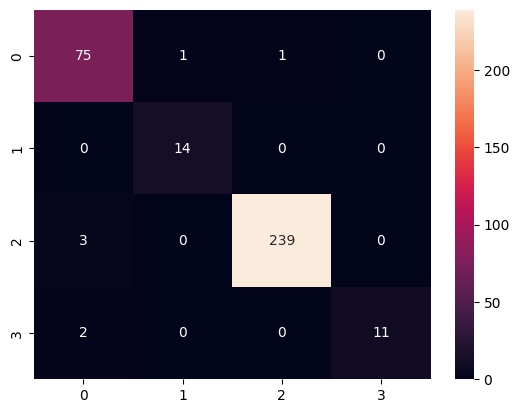

In [17]:
# plot cm
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6,7,8,9,10],
}

clf = GridSearchCV(dt,params,cv=5)
clf.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [19]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10}
0.9667006749332915
DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [20]:
model = clf.best_estimator_
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9739884393063584
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        77
         1.0       0.74      1.00      0.85        14
         2.0       1.00      0.98      0.99       242
         3.0       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.92      0.95      0.93       346
weighted avg       0.98      0.97      0.97       346



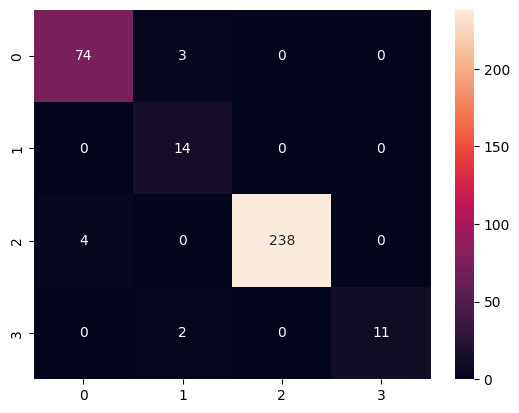

In [21]:
# plot cm
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()